<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/Copy_of_ClassificationUsingDecissionTree_Milda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##ML-3 Classification using Decision Tree

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


##Load dataset

In [15]:
df = pd.read_csv("patient_dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Data Exploration

In [17]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [18]:
print(X, '\n')
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

##Modeling

In [20]:
model_default = DecisionTreeClassifier()
model_default = model_default.fit(X_train, Y_train)

model_DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, max_leaf_nodes=4, random_state=25)
model_DT = model_DT.fit(X_train, Y_train)

##Evaluation

In [21]:
y_pred_train_default = model_default.predict(X_train)
y_pred_default = model_default.predict(X_test)

print("Train Accuracy  :", metrics.accuracy_score(Y_train, y_pred_train_default))
print("Test Precission :", metrics.accuracy_score(Y_train, y_pred_train_default))
print("Train Recall    :", metrics.accuracy_score(Y_train, y_pred_train_default), '\n')

print("Train Accuracy  :", metrics.accuracy_score(Y_test, y_pred_default))
print("Test Precission :", metrics.accuracy_score(Y_test, y_pred_default))
print("Train Recall    :", metrics.accuracy_score(Y_test, y_pred_default))



Train Accuracy  : 1.0
Test Precission : 1.0
Train Recall    : 1.0 

Train Accuracy  : 0.7402597402597403
Test Precission : 0.7402597402597403
Train Recall    : 0.7402597402597403


In [22]:
y_pred_train = model_DT.predict(X_train)
y_pred = model_DT.predict(X_test)

print("Train Accuracy  :", metrics.accuracy_score(Y_train, y_pred_train))
print("Test Precission :", metrics.accuracy_score(Y_train, y_pred_train))
print("Train Recall    :", metrics.accuracy_score(Y_train, y_pred_train), '\n')

print("Train Accuracy  :", metrics.accuracy_score(Y_test, y_pred))
print("Test Precission :", metrics.accuracy_score(Y_test, y_pred))
print("Train Recall    :", metrics.accuracy_score(Y_test, y_pred))

Train Accuracy  : 0.7719869706840391
Test Precission : 0.7719869706840391
Train Recall    : 0.7719869706840391 

Train Accuracy  : 0.7727272727272727
Test Precission : 0.7727272727272727
Train Recall    : 0.7727272727272727


In [23]:
nama_label = ['Tidak berpotensi diabetes', 'Berpotensi diabetes']

print('Classification Report Model dengan Hyperparameter Default:\n')
print(classification_report(Y_test, y_pred_default, target_names=nama_label))

print('\n\nClassification Report Model dengan Tuning Hyperparameter:\n')
print(classification_report(Y_test, y_pred, target_names=nama_label))


Classification Report Model dengan Hyperparameter Default:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.83      0.75      0.79        99
      Berpotensi diabetes       0.62      0.73      0.67        55

                 accuracy                           0.74       154
                macro avg       0.72      0.74      0.73       154
             weighted avg       0.75      0.74      0.74       154



Classification Report Model dengan Tuning Hyperparameter:

                           precision    recall  f1-score   support

Tidak berpotensi diabetes       0.79      0.88      0.83        99
      Berpotensi diabetes       0.73      0.58      0.65        55

                 accuracy                           0.77       154
                macro avg       0.76      0.73      0.74       154
             weighted avg       0.77      0.77      0.77       154



##Men-Generate Tree

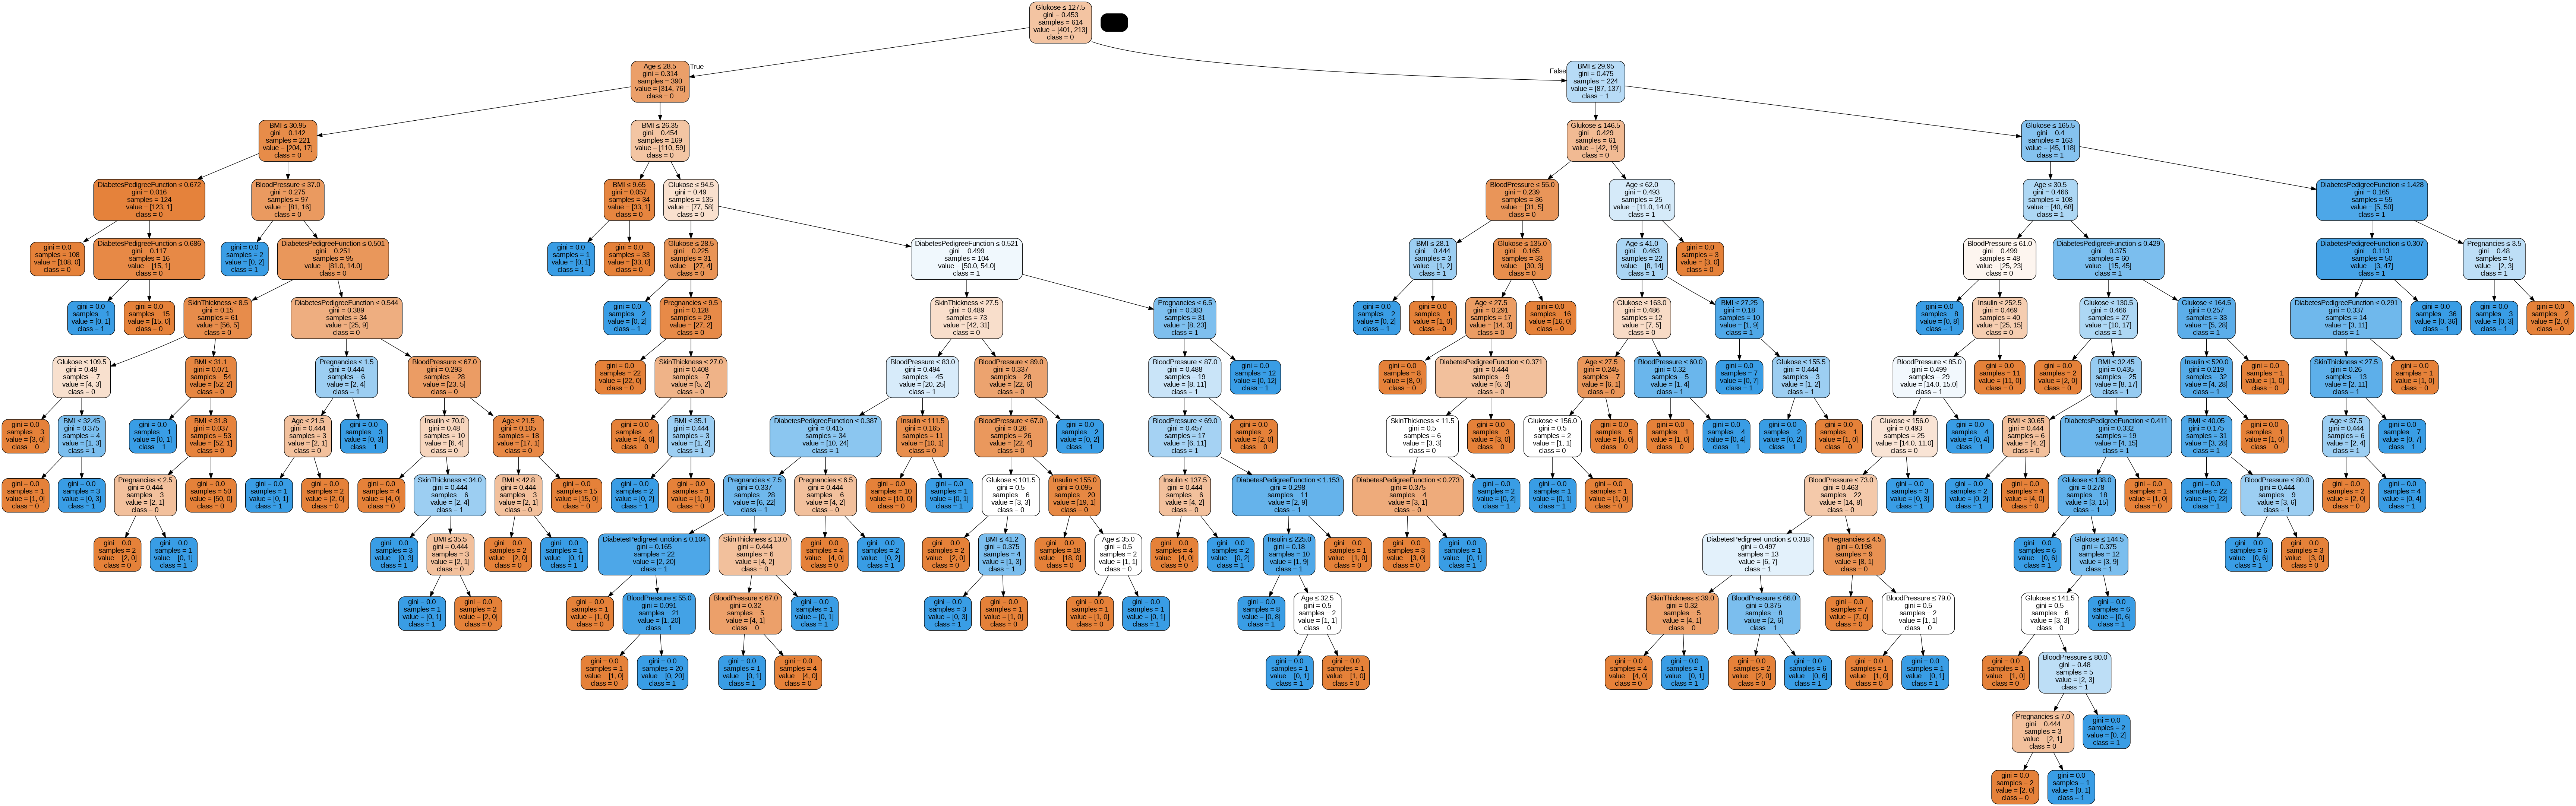

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glukose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_default,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names= ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_default.png')
Image(graph.create_png())

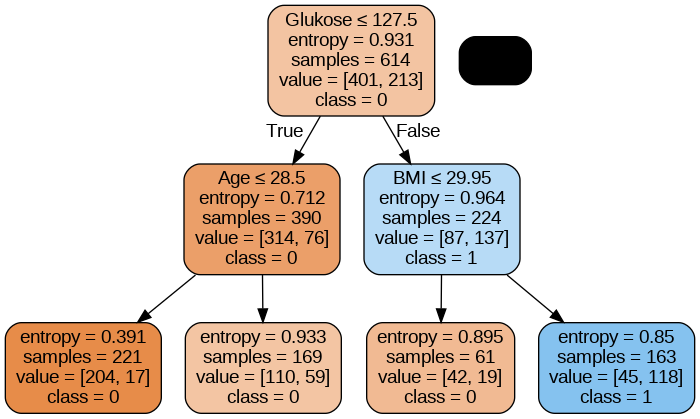

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols = ['Pregnancies', 'Glukose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()

export_graphviz(model_DT,
                out_file=dot_data,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names= ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree_model_DT.png')
Image(graph.create_png())

Feature: Pregnancies Score 0.05910752087808977 %
Feature: Glukose Score 0.31482379132982796 %
Feature: BloodPressure Score 0.15750349601647465 %
Feature: SkinThickness Score 0.04910570207374252 %
Feature: Insulin Score 0.05091710847466102 %
Feature: BMI Score 0.16435041644718787 %
Feature: DiabetesPedigreeFunction Score 0.09276915010383498 %
Feature: Age Score 0.1114228146761812 %


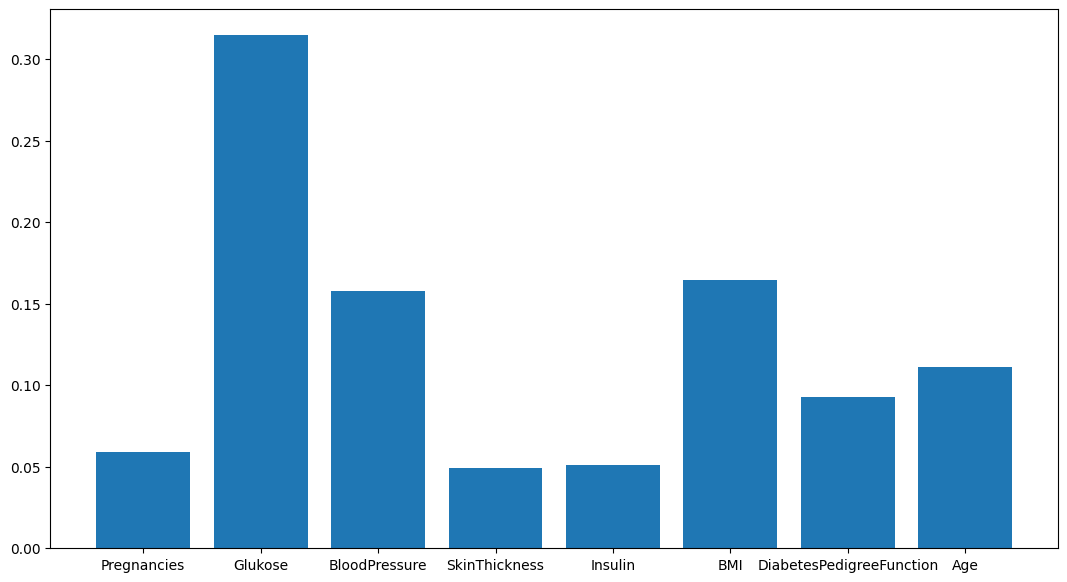

In [26]:
importance = model_default.feature_importances_

for i,v in enumerate(importance):
  print('Feature:', feature_cols[i],'Score', v, '%' )

plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()



##Kesimpulan

In [ ]:
Pregnancies = float(input('Input Pregnancies = '))
Glukose = float(input('Input Glucose = '))
BloodPressure = float(input('Input BloodPressure ='))
SkinThickness = float(input('Input Skin Thickness = '))
Insulin = float(input('Input Insulin = '))
BMI = float(input('Input BMI = '))
DiabetesPedigreeFunction = float(input('Input Diabetes Pedigree Function = '))
Age = float(input('Input Age = '))
data_baru = [[Pregnancies, Glukose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]

hasil_prediksi = model_DT.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

if hasil_prediksi == 0:
  print('\nTidak berpotensi menderita diabetes!')
else:
  print('\nBerpotensi menderita diabetes!')